<a href="https://colab.research.google.com/github/kaylaque/senyumin/blob/main/Model_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# extract zipfile
import zipfile,os
zip_ref = zipfile.ZipFile('rockpaperscissors.zip', 'r')
zip_ref.extractall('/')
zip_ref.close()
#define directory of dataset
directory = '/rockpaperscissors/rps-cv-images'

In [ ]:
dir = '/content/drive/MyDrive/dsc/PLAN A [DATASET FAILED]/fer2013/fer'

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:
# augmentate data with ImageDataGenerator and amount of validation's data is 20%  of total data
aug_data = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=5,
    height_shift_range=0.2,
    # zca_whitening=True,
    vertical_flip = True,
    brightness_range=[0.2,1.0],
    zoom_range=[1.5,1.0],
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
# define training data
train_gen = aug_data.flow_from_directory(
    dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)
# define validation data
val_gen = aug_data.flow_from_directory(
    dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 6318 images belonging to 5 classes.
Found 1577 images belonging to 5 classes.


In [ ]:
num_classes = len(val_gen.class_indices)
print(val_gen.class_indices)

{'angry': 0, 'disgust': 1, 'happy': 2, 'sad': 3, 'surprised': 4}


In [ ]:
#define the model architecture
model = Sequential()
model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(224, 224, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
# model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(120, (5, 5), activation='relu'))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
# compile model and define loss function & optimizer 
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 6)       456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 16)      2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 120)       48120     
_________________________________________________________________
dropout (Dropout)            (None, 52, 52, 120)       0         
_________________________________________________________________
flatten (Flatten)            (None, 324480)            0

In [ ]:
filepath = '/content/drive/MyDrive/dsc/PLAN B [ONGOING]/'
callbacks = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_loss",
    verbose=0,
    save_best_only=False,
    save_weights_only=True,
    mode="auto",
    save_freq="epoch",
    options=None
)

In [ ]:
#run the training process
result=model.fit(
    train_gen,
    steps_per_epoch=25, # batch per epoch
    epochs=100, #number of epoch
    callbacks=callbacks, 
    validation_data=val_gen, #show acc of val data test
    validation_steps=5, #batch per epoch
    verbose=1
)

Epoch 1/100
25/25 [==============================] - 321s 13s/step - loss: 2.2831 - accuracy: 0.2897 - val_loss: 1.4353 - val_accuracy: 0.4563
Epoch 2/100
25/25 [==============================] - 203s 8s/step - loss: 1.4137 - accuracy: 0.4061 - val_loss: 1.3921 - val_accuracy: 0.4000
Epoch 3/100
25/25 [==============================] - 169s 7s/step - loss: 1.4722 - accuracy: 0.3718 - val_loss: 1.3639 - val_accuracy: 0.4000
Epoch 4/100
25/25 [==============================] - 154s 6s/step - loss: 1.4348 - accuracy: 0.3971 - val_loss: 1.5036 - val_accuracy: 0.2000
Epoch 5/100
25/25 [==============================] - 145s 6s/step - loss: 1.4669 - accuracy: 0.3556 - val_loss: 1.4235 - val_accuracy: 0.3562
Epoch 6/100
25/25 [==============================] - 125s 5s/step - loss: 1.4314 - accuracy: 0.3463 - val_loss: 1.4241 - val_accuracy: 0.3625
Epoch 7/100
25/25 [==============================] - 113s 4s/step - loss: 1.4168 - accuracy: 0.3640 - val_loss: 1.3713 - val_accuracy: 0.4000
Epoch

In [ ]:
%cd "/content/drive/MyDrive/dsc/PLAN B [ONGOING]/"
model.save_weights('model_weightsScratch.h5')
model.save('model_kerasScratch.h5')
print("Saved model to disk")

/content/drive/MyDrive/dsc/PLAN B [ONGOING]
Saved model to disk


<Figure size 432x288 with 0 Axes>

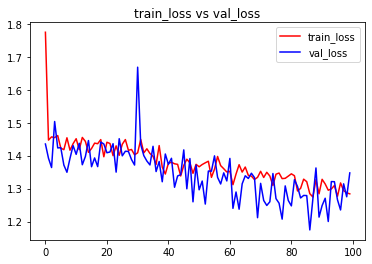

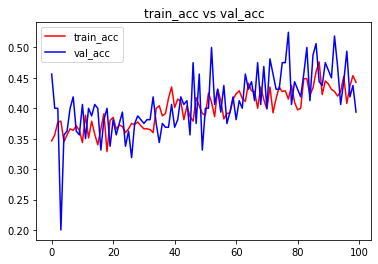

<Figure size 432x288 with 0 Axes>

In [ ]:
# visualizing losses and accuracy
import matplotlib.pyplot as plt
%matplotlib inline

train_loss=result.history['loss']
val_loss=result.history['val_loss']
train_acc=result.history['accuracy']
val_acc=result.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()